# DATA SCIENCE SCHOOL :: Introduction to ML in Python
### An Intensive Python ML Course
## Task Sheet: Regularized Multiple Linear Regression - Solutions

[&larr; Back to course webpage](http://datakolektiv.com/app_direct/introdsnontech/)

![](../img/IntroMLPython_Head.png)

Feedback should be send to [goran.milovanovic@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com). 

These notebooks accompany the DATA SCIENCE SCHOOL :: Introduction to ML in Python course.

### Goran S. Milovanović, PhD
<b>DataKolektiv, Chief Scientist & Owner</b>

### Aleksandar Cvetković, PhD
<b>DataKolektiv, Consultant</b>

![](../img/DK_Logo_100.png)

## Setup

In [1]:
### --- Setup - importing the libraries

# - supress those annoying 'Future Warning'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# - data
import numpy as np
import pandas as pd

# - os
import os

# - ml
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor


# - visualization
import matplotlib.pyplot as plt
import seaborn as sns


# - parameters
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'
sns.set_theme()

# - rng
rng = np.random.default_rng()

# - plots
plt.rc("figure", figsize=(8, 6))
plt.rc("font", size=14)
sns.set_theme(style='white')

# - directory tree
data_dir = os.path.join(os.getcwd(), '_data')

In [2]:
data_set = pd.read_csv(os.path.join(data_dir, 'kc_house_data.csv'))
data_set.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Task 0

### Target: predict price from the numerical predictors

In [4]:
# - for the simplicity we will drop some variables from the dataset
model_frame = data_set.drop(columns = ['id', 'lat', 'long', 'date',
                                      'zipcode', 'yr_renovated', 'waterfront',
                                      'view', 'sqft_basement'])
model_frame.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1987,1800,7503


In [5]:
predictors = model_frame.columns.drop('price')
predictors

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'yr_built', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [6]:
# - the correlations of the predictors
model_frame[predictors].corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
bedrooms,1.000000,0.515884,0.576671,0.031703,0.175429,0.028472,0.356967,0.477600,0.154178,0.391638,0.029244
bathrooms,0.515884,1.000000,0.754665,0.087740,0.500653,-0.124982,0.664983,0.685342,0.506019,0.568634,0.087175
sqft_living,0.576671,0.754665,1.000000,0.172826,0.353949,-0.058753,0.762704,0.876597,0.318049,0.756420,0.183286
sqft_lot,0.031703,0.087740,0.172826,1.000000,-0.005201,-0.008958,0.113621,0.183512,0.053080,0.144608,0.718557
floors,0.175429,0.500653,0.353949,-0.005201,1.000000,-0.263768,0.458183,0.523885,0.489319,0.279885,-0.011269
condition,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,1.000000,-0.144674,-0.158214,-0.361417,-0.092824,-0.003406
grade,0.356967,0.664983,0.762704,0.113621,0.458183,-0.144674,1.000000,0.755923,0.446963,0.713202,0.119248
sqft_above,0.477600,0.685342,0.876597,0.183512,0.523885,-0.158214,0.755923,1.000000,0.423898,0.731870,0.194050
yr_built,0.154178,0.506019,0.318049,0.053080,0.489319,-0.361417,0.446963,0.423898,1.000000,0.326229,0.070958
sqft_living15,0.391638,0.568634,0.756420,0.144608,0.279885,-0.092824,0.713202,0.731870,0.326229,1.000000,0.183192


In [7]:
# --- Composing the fomula of the model

# - right side of the formula
formula = ' + '.join(predictors)

# - left side of the formula
formula = 'price ~ ' + formula

formula

'price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + condition + grade + sqft_above + yr_built + sqft_living15 + sqft_lot15'

In [8]:
# - fitting the linear model to the data
mlr = smf.ols(formula=formula, data=model_frame).fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     3202.
Date:                Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:55:08   Log-Likelihood:            -2.9715e+05
No. Observations:               21613   AIC:                         5.943e+05
Df Residuals:                   21601   BIC:                         5.944e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.933e+06   1.36e+05     51.002      0.000    6.67e+06     7.2e+06
bedrooms      -4.936e+04   2108.805    -23.406      0.000   -5.35e+04   -4.52e+04
bathrooms       5.01e+04   3625.970     13.817      0.000     4.3e+04    5.72e+04
sqft_living     195.1515      4.812     40.552      0.000     185.719     204.584
sqft_lot          0.0111      0.054      0.207      0.836      -0.094       0.116
floors         3.348e+04   3957.258      8.461      0.000    2.57e+04    4.12e+04
condition      1.898e+04   2580.038      7.356      0.000    1.39e+04     2.4e+04
grade          1.246e+05   2346.774     53.099      0.000     1.2e+05    1.29e+05
sqft_above      -28.6643      4.678     -6.128      0.000     -37.833     -19.496
yr_built      -3968.3906     69.774    -56.875      0.000   -4105.152   -3831.629
sqft_living15    36.2656      3.735      9.709      0.000      28.944      43.587
sqft_lot15       -0.5066      0.082     -6.172      0.000      -0.667      -0.346
==============================================================================
Omnibus:                    17771.672   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1362466.098
Skew:                           3.467   Prob(JB):                         0.00
Kurtosis:                      41.274   Cond. No.                     4.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# - R^2 of the linear model
mlr.rsquared

0.6198708417378094

In [10]:
# - computing VIFs
model_frame_predictors = sm.add_constant(model_frame[predictors])
vifs = [variance_inflation_factor(model_frame_predictors.values, i) for i in range(1, len(predictors)+1)]
vifs = np.array(vifs).reshape(1, -1)
vifs
pd.DataFrame(vifs, columns=predictors)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
0,1.621833,3.287936,8.236167,2.085978,1.925165,1.188449,3.208241,6.325912,1.770933,2.763124,2.117307


### Regularization of the model coefficients: Ridge (L2) Regularization

Now we are going to use scikit-learn to perform *Regularized* Multiple Linear Regression; we'll be using the Ridge Regression. 

The Ridge Regression model is obtained by minimizing the function

$$MSE + \alpha (L2)^2,$$

where $MSE$ is the Mean Squarred Error of the 'ordinary' MLP 

$$\hat{y} = \beta_1x_1 + \beta_2x_2 + \cdots + \beta_kx_k + n,$$

and $(L2)^2$ is the squared $L2-$norm of MLP model parameters $\beta_1,\beta_2,\ldots,\beta_k$:

$$(L2)^2 = \beta_1^2 + \beta_2^2 + \cdots + \beta_k^2,$$

and hence the name L2 Regularization. $\alpha$ is called *penalization (hyper)parameter*, and it's used to control the magnitude of models parameters; for $\alpha = 0$ we recover ordinary MLR.



In [11]:
from sklearn import linear_model

In [12]:
model_frame.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1987,1800,7503


In [13]:
# - checking if all the variables are numerical
model_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   condition      21613 non-null  int64  
 7   grade          21613 non-null  int64  
 8   sqft_above     21613 non-null  int64  
 9   yr_built       21613 non-null  int64  
 10  sqft_living15  21613 non-null  int64  
 11  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 2.0 MB


In [14]:
# - feature matrix
X = model_frame[predictors].values

# - target vector
y = model_frame['price'].values

In [15]:
### --- Fitting a Ridge MLR Regularized model on the given data, with the penalization parameter \alpha = 10^4
mlr_ridge = linear_model.Ridge(alpha=1e+4)
mlr_ridge.fit(X, y)

Ridge(alpha=10000.0)

In [16]:
# - model intercept
mlr_ridge.intercept_

5945635.344976567

In [17]:
# - model coefficients; the order corresponds to the order of coefficients given by the statsmodel 'ordinary' MLR
mlr_ridge.coef_

array([-2.91771401e+04,  1.81662857e+04,  2.26257901e+02,  1.41002993e-02,
        1.59074953e+04,  7.12968872e+03,  6.53923517e+04, -5.50894014e+00,
       -3.28129969e+03,  6.05780655e+01, -6.44587129e-01])

In [18]:
# - R^2 score of the Ridge Regularization
mlr_ridge.score(X, y)

0.6013062798111166

In [19]:
### --- Varying the penalization parameter for the Ridge Regularized Model
n_alphas = 200
alphas = np.logspace(-2, 10, n_alphas)

coefs = []
scores = []
mserrs = []
l2_norms = []
for a in alphas:
    # - fitting a Ridge Regularization
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(X, y)
    
    # - R^2 score of a fitted Regularized Model
    R2 = ridge.score(X, y)
    
    # - MSE of a model
    mse = np.mean((y - ridge.predict(X))**2)
    
    # - squared L2 norm of model coefficients
    l2 = np.linalg.norm(ridge.coef_, ord=2)**2
    
    coefs.append(ridge.coef_)
    scores.append(R2)
    mserrs.append(mse)
    l2_norms.append(l2)

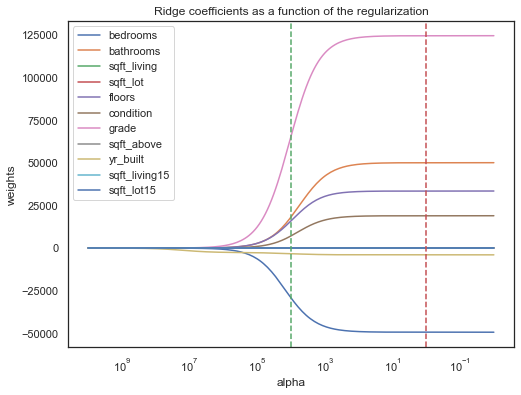

In [20]:
### --- Plotting the dependence of model parameters vs. the penalization parameter
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
ax.axvline(x=1, c='r', ls='--') # red line, corresponding to \alpha = 1
ax.axvline(x=10000, c='g', ls='--') # green line, corresponding to \alpha = 10^4
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.legend(predictors)
plt.show()

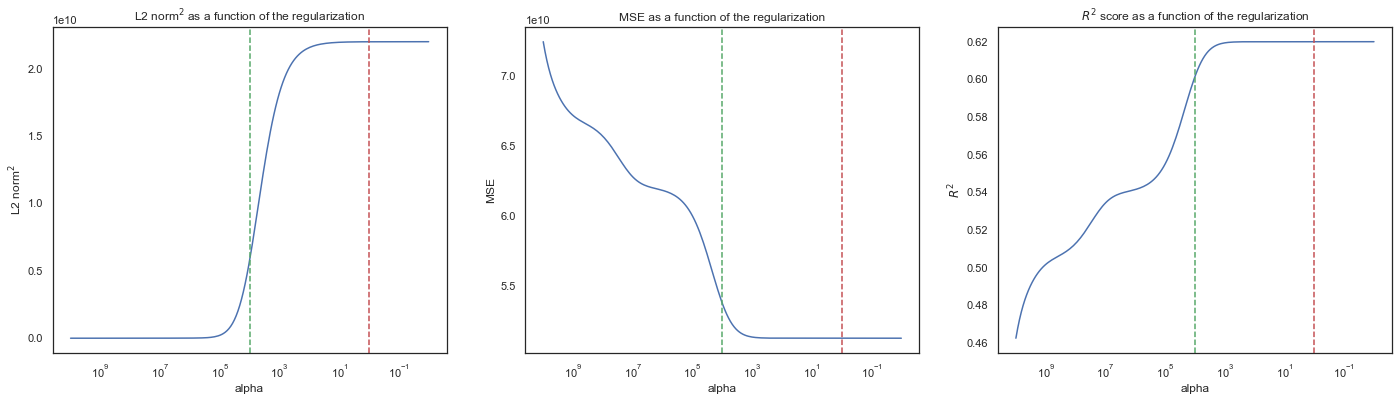

In [21]:
### --- Plotting the dependance of various model metrics vs. the penalization hyperparameter
ig, ax = plt.subplots(1, 3, figsize=(24, 6), sharex=True)


# - squared L2-norm vs. \alpha
ax[0].plot(alphas, l2_norms)
ax[0].set_xscale("log")
ax[0].set_xlim(ax[0].get_xlim()[::-1])  # reverse axis
ax[0].axvline(x=1, c='r', ls='--') # red line
ax[0].axvline(x=10000, c='g', ls='--') # green line
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("L2 norm$^2$")
ax[0].set_title("L2 norm$^2$ as a function of the regularization")
ax[0].axis("tight")

# - MSE vs. \alpha
ax[1].plot(alphas, mserrs)
ax[1].set_xscale("log")
ax[1].axvline(x=1, c='r', ls='--') # red line
ax[1].axvline(x=10000, c='g', ls='--') # green line
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("MSE")
ax[1].set_title("MSE as a function of the regularization")
ax[1].axis("tight")

# - R^2 vs. \alpha
ax[2].plot(alphas, scores)
ax[2].set_xscale("log")
ax[2].axvline(x=1, c='r', ls='--') # red line
ax[2].axvline(x=10000, c='g', ls='--') # green line
ax[2].set_xlabel("alpha")
ax[2].set_ylabel("$R^2$")
ax[2].set_title("$R^2$ score as a function of the regularization")
ax[2].axis("tight");

We see that the best model is obtained with small penalization hyperparameter, i.e. with big model parameters values.

### Cross-validation: The search for the best penalization hyperparameter 

In order to find the most optimal penalization hyperparameter we may use *cross-validation* across the 'grid' of hyperparameters, fitting a model for every $\alpha$ and then choosing the best perfoming-one (i.e. with the lowest MSE). 

In [22]:
### --- Performing the cross validation across all the given values of \alpha
ridgeCV = linear_model.RidgeCV(alphas=alphas)
ridgeCV.fit(X, y)

RidgeCV(alphas=array([1.00000000e-02, 1.14895100e-02, 1.32008840e-02, 1.51671689e-02,
       1.74263339e-02, 2.00220037e-02, 2.30043012e-02, 2.64308149e-02,
       3.03677112e-02, 3.48910121e-02, 4.00880633e-02, 4.60592204e-02,
       5.29197874e-02, 6.08022426e-02, 6.98587975e-02, 8.02643352e-02,
       9.22197882e-02, 1.05956018e-01, 1.21738273e-01, 1.39871310e-01,
       1.60705282e-01, 1.84642494e-0...
       4.10265811e+08, 4.71375313e+08, 5.41587138e+08, 6.22257084e+08,
       7.14942899e+08, 8.21434358e+08, 9.43787828e+08, 1.08436597e+09,
       1.24588336e+09, 1.43145894e+09, 1.64467618e+09, 1.88965234e+09,
       2.17111795e+09, 2.49450814e+09, 2.86606762e+09, 3.29297126e+09,
       3.78346262e+09, 4.34701316e+09, 4.99450512e+09, 5.73844165e+09,
       6.59318827e+09, 7.57525026e+09, 8.70359136e+09, 1.00000000e+10]))

In [23]:
# - penalization for the best model
ridgeCV.alpha_

62.94988990221888

In [24]:
# - intercept of the best model
ridgeCV.intercept_

6918844.570352528

In [25]:
# - coefficients of the best model
ridgeCV.coef_

array([-4.91249314e+04,  4.95040723e+04,  1.95665644e+02,  1.15399868e-02,
        3.32759385e+04,  1.87993883e+04,  1.23919064e+05, -2.84158413e+01,
       -3.95885184e+03,  3.65365654e+01, -5.08328697e-01])

In [26]:
# - R^2 score of the best model
ridgeCV.score(X, y)

0.6198678785012652

In [27]:
# - ordinary MLR still performs a bit better (difference is of the order of 10^(-5))
# - \alpha = 0 was not included in our grid of \alphas! 
mlr.rsquared

0.6198708417378094

## Task 1

### LASSO (L1) Regularization

*LASSO* is another way to regularize MLR model. It's obtained by minimizing the function

$$\frac{1}{2}MSE + \alpha L1,$$

where $MSE$ is Mean Squared Error of the ordinary MLR and $L1$ is $L1-$norm of its coeffitents given by

$$L1 = |\beta_1| + |\beta_2| + \cdots + |\beta_k|,$$

and hence the name $L1$ Regularization. $\alpha$ is, of course, penalization hyperparameter. 



Both Ridge and LASSO Regularizations are a part of a more general *Elastic-net* Regularization, obtaned by minimizing the function 

$$\frac{1}{2}MSE + \alpha\Big(\rho L1 + \frac{1 - \rho}{2}(L2)^2\Big),$$

where $\rho\in[0,1]$ is yet another hyper parameter. For $\rho = 0$ one recovers Ridge Regularization, and for $\rho = 1$ LASSO Regularization.

Your task here is to perform a similar analysis using LASSO Regularization as the one with Ridge Regularization above, using `linear_model.Lasso` and `linear_model.LassoCV` from scikit-learn.

In [28]:
### --- Varying the penalization parameter for the LASSO Regularized Model
n_alphas = 200
alphas = np.logspace(-2, 10, n_alphas)

coefs = []
scores = []
mserrs = []
l1_norms = []
for a in alphas:
    # - fitting a LASSO Regularization
    lasso = linear_model.Lasso(alpha=a)
    lasso.fit(X, y)
    
    # - R^2 score of a fitted Regularized Model
    R2 = lasso.score(X, y)
    
    # - MSE of a model
    mse = np.mean((y - lasso.predict(X))**2)
    
    # - L1 norm of model coefficients
    l1 = np.linalg.norm(lasso.coef_, ord=1)
    
    coefs.append(lasso.coef_)
    scores.append(R2)
    mserrs.append(mse)
    l1_norms.append(l1)

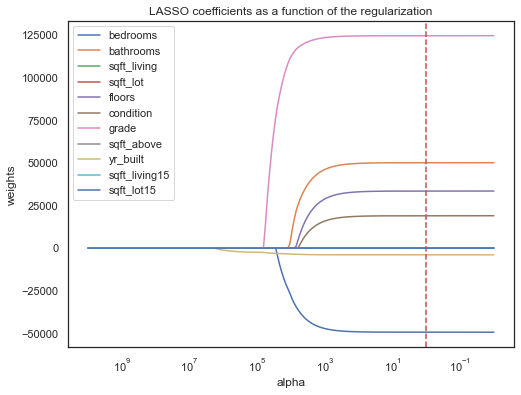

In [29]:
### --- Plotting the dependence of model parameters vs. the penalization parameter
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis, 
ax.axvline(x=1, c='r', ls='--') # red line, corresponding to \alpha = 1
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("LASSO coefficients as a function of the regularization")
plt.axis("tight")
plt.legend(predictors)
plt.show()

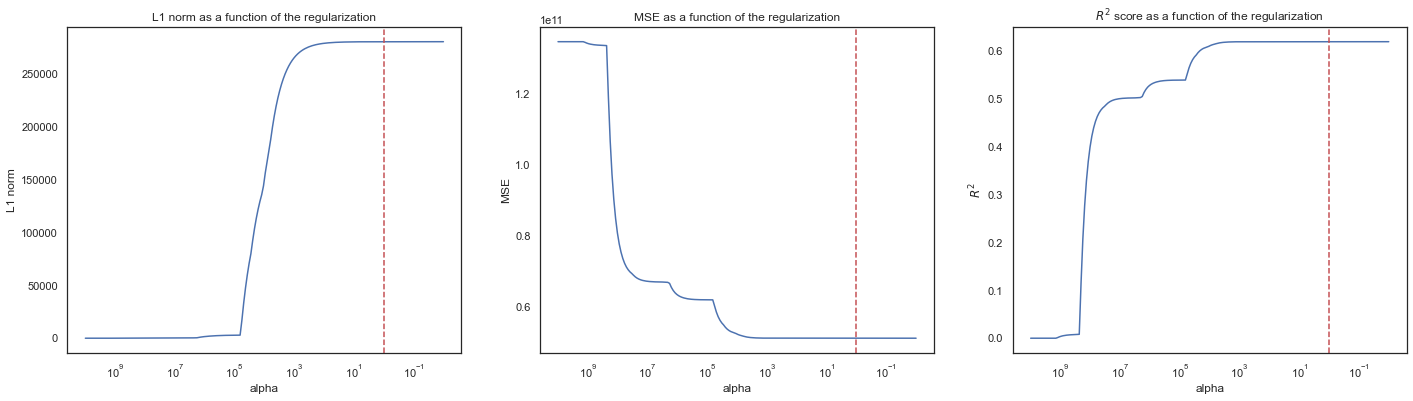

In [30]:
### --- Plotting the dependance of various model metrics vs. the penalization hyperparameter
ig, ax = plt.subplots(1, 3, figsize=(24, 6), sharex=True)

# - L1-norm vs. \alpha
ax[0].plot(alphas, l1_norms)
ax[0].set_xscale("log")
ax[0].set_xlim(ax[0].get_xlim()[::-1])  # reverse axis
ax[0].axvline(x=1, c='r', ls='--') # red line
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("L1 norm")
ax[0].set_title("L1 norm as a function of the regularization")
ax[0].axis("tight")

# - MSE vs. \alpha
ax[1].plot(alphas, mserrs)
ax[1].set_xscale("log")
ax[1].axvline(x=1, c='r', ls='--') # red line
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("MSE")
ax[1].set_title("MSE as a function of the regularization")
ax[1].axis("tight")


# - R^2 vs. \alpha
ax[2].plot(alphas, scores)
ax[2].set_xscale("log")
ax[2].axvline(x=1, c='r', ls='--') # red line
ax[2].set_xlabel("alpha")
ax[2].set_ylabel("$R^2$")
ax[2].set_title("$R^2$ score as a function of the regularization")
ax[2].axis("tight");

We see that the best model is obtained with small penalization hyperparameter, i.e. with big model parameters values.

### Cross-validation

In [31]:
### --- Performing the cross validation across all the given values of \alpha
lassoCV = linear_model.LassoCV(alphas=alphas)
lassoCV.fit(X, y)

LassoCV(alphas=array([1.00000000e-02, 1.14895100e-02, 1.32008840e-02, 1.51671689e-02,
       1.74263339e-02, 2.00220037e-02, 2.30043012e-02, 2.64308149e-02,
       3.03677112e-02, 3.48910121e-02, 4.00880633e-02, 4.60592204e-02,
       5.29197874e-02, 6.08022426e-02, 6.98587975e-02, 8.02643352e-02,
       9.22197882e-02, 1.05956018e-01, 1.21738273e-01, 1.39871310e-01,
       1.60705282e-01, 1.84642494e-0...
       4.10265811e+08, 4.71375313e+08, 5.41587138e+08, 6.22257084e+08,
       7.14942899e+08, 8.21434358e+08, 9.43787828e+08, 1.08436597e+09,
       1.24588336e+09, 1.43145894e+09, 1.64467618e+09, 1.88965234e+09,
       2.17111795e+09, 2.49450814e+09, 2.86606762e+09, 3.29297126e+09,
       3.78346262e+09, 4.34701316e+09, 4.99450512e+09, 5.73844165e+09,
       6.59318827e+09, 7.57525026e+09, 8.70359136e+09, 1.00000000e+10]))

In [32]:
# - penalization for the best model
lassoCV.alpha_

0.01

In [33]:
# - intercept of the best model
lassoCV.intercept_

6932999.837679353

In [34]:
# - coefficients of the best model
lassoCV.coef_

array([-4.93596460e+04,  5.00988748e+04,  1.95151515e+02,  1.11092061e-02,
        3.34811372e+04,  1.89775169e+04,  1.24611278e+05, -2.86642652e+01,
       -3.96839013e+03,  3.62655586e+01, -5.06572395e-01])

In [35]:
# - R^2 score of the best model
lassoCV.score(X, y)

0.6198708417377982

In [36]:
# - same performance as MLR model
mlr.rsquared

0.6198708417378094

Goran S. Milovanović & Aleksandar Cvetković

DataKolektiv, 2022/23.

[hello@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com)

![](../img/DK_Logo_100.png)

<font size=1>License: <a href="https://www.gnu.org/licenses/gpl-3.0.txt">GPLv3</a> This Notebook is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This Notebook is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this Notebook. If not, see <a href="http://www.gnu.org/licenses/">http://www.gnu.org/licenses/</a>.</font>